In [2]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# load shipment rate data
import warnings

warnings.filterwarnings("ignore")

fl_morph_rate = pd.read_csv(
    "./estimating-impact-of-opioids-2020-team2/20_intermediate_files/FL_shipment_and_pop.csv",
    sep=",",
    index_col=0,
)

In [6]:
fl_morph_rate = fl_morph_rate.drop(["MORPH_POP_RATIO"], axis=1)
fl_morph_rate["MORPH_POP_RATIO"] = (
    fl_morph_rate["MORPHINE_EQUIV_IN_MG"] / fl_morph_rate["Population"]
)

In [8]:
fl_morph_rate.tail()

,Year,BUYER_STATE,County,MORPHINE_EQUIV_IN_MG,Population,MORPH_POP_RATIO
15104978,2008,FL,HILLSBOROUGH,403425.00,1196773.0,0.337094
15104979,2009,FL,HILLSBOROUGH,3027.00,1214050.0,0.002493
15104980,2009,FL,HILLSBOROUGH,1513.50,1214050.0,0.001247
15104981,2010,FL,HILLSBOROUGH,100856.25,1233498.0,0.081764
15104982,2011,FL,HILLSBOROUGH,193644.00,1255503.0,0.154236


In [9]:
fl_morph_rate_by_county = fl_morph_rate.groupby(
    ["Year", "BUYER_STATE", "County"], as_index=False
)["MORPH_POP_RATIO"].mean()

In [10]:
fl_morph_rate_by_county

,Year,BUYER_STATE,County,MORPH_POP_RATIO
0,2006,FL,ALACHUA,0.016083
1,2006,FL,BAKER,0.159267
2,2006,FL,BAY,0.017898
3,2006,FL,BRADFORD,0.134981
4,2006,FL,BREVARD,0.006493
...,...,...,...,...
595,2014,FL,UNION,0.301418
596,2014,FL,VOLUSIA,0.009910
597,2014,FL,WAKULLA,0.134534
598,2014,FL,WALTON,0.083631


### Plot Pre-Post Policy for Florida

In [7]:
pre = fl_morph_rate[fl_morph_rate["Year"] < 2010]

In [9]:
pre["County"].describe()

count     6628328
unique         67
top       BROWARD
freq       575310
Name: County, dtype: object

In [10]:
post = fl_morph_rate[fl_morph_rate["Year"] >= 2010]

In [11]:
post["County"].describe()

count     8476639
unique         67
top       BROWARD
freq       671623
Name: County, dtype: object

In [25]:
post_pop = post.groupby(["Year", "BUYER_STATE", "County"], as_index=False)[
    "Population"
].sum()

In [26]:
post.groupby(["Year"])["Population"].sum()

Year
2010    1.457810e+12
2011    1.435977e+12
2012    1.340370e+12
2013    1.383552e+12
2014    1.190045e+12
Name: Population, dtype: float64

In [13]:
pre["MORPH_POP_RATIO"].describe()

count    6.469686e+06
mean     1.747875e-02
std      6.860913e-02
min      1.149798e-07
25%      1.356760e-03
50%      3.707759e-03
75%      1.151275e-02
max      2.352885e+01
Name: MORPH_POP_RATIO, dtype: float64

In [9]:
fl_pre_policy = fl_morph_rate_by_county[fl_morph_rate_by_county["Year"] < 2010]

In [15]:
fl_post_policy = fl_morph_rate_by_county[fl_morph_rate_by_county["Year"] >= 2010]

In [16]:
fl_post_policy["MORPH_POP_RATIO"].describe()

count    320.000000
mean       0.111930
std        0.192143
min        0.001743
25%        0.015763
50%        0.054430
75%        0.151641
max        2.221451
Name: MORPH_POP_RATIO, dtype: float64

In [6]:
# seperate to pre and post policy periods for FL

x_pre = np.array(
    fl_morph_rate_by_county[fl_morph_rate_by_county["Year"] < 2010]["Year"]
)
y_pre = np.array(
    fl_morph_rate_by_county[fl_morph_rate_by_county["Year"] < 2010]["MORPH_POP_RATIO"]
)

x_post = np.array(
    fl_morph_rate_by_county[fl_morph_rate_by_county["Year"] >= 2010]["Year"]
)
y_post = np.array(
    fl_morph_rate_by_county[fl_morph_rate_by_county["Year"] >= 2010]["MORPH_POP_RATIO"]
)

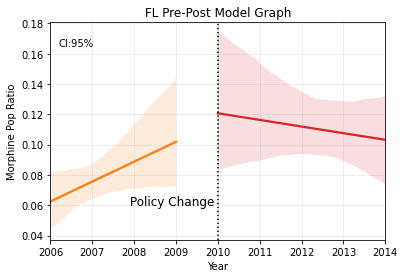

In [7]:
import warnings

warnings.filterwarnings("ignore")

# plot the figure

# fig, ax = plt.subplots()
# ax.plot(x_pre, y_pre, "o")
m, b = np.polyfit(x_pre, y_pre, 1)
plt.plot(x_pre, m * x_pre + b)
ax = sns.regplot(x_pre, y_pre, ci=95, scatter=False)

# ax.plot(x_post, y_post, "o")
m, b = np.polyfit(x_post, y_post, 1)
plt.plot(x_post, m * x_post + b)
ax = sns.regplot(x_post, y_post, ci=95, scatter=False)

plt.xlabel("Year")
plt.ylabel("Morphine Pop Ratio")
plt.title("FL Pre-Post Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2007.9, 0.06, "Policy Change", fontsize=12)
plt.text(2006.2, 0.165, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.show()